In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 12
import seaborn as sns

기울기와 y절편을 계산할 데이터를 만든다.

In [2]:
xData = [2, 4, 6, 8] # 공부 시간
yData = [81, 93, 91, 97] # 공부 시간에 따른 시험 점수 => 실제값

공부 시간과 공부 시간에 따른 시험 점수 데이터를 데이터프레임으로 만든다.

In [3]:
df = pd.DataFrame(columns=['x', 'y']) # 빈 데이터프레임을 만든다.
# 빈 데이터프레임에 데이터를 넣을 때는 loc[index]를 사용해서 리스트 형태의 데이터를 넣어주면 된다.
df.loc[0] = [2, 81]
df.loc[1] = [4, 93]
df.loc[2] = [6, 91]
df.loc[3] = [8, 97]
df

,x,y
0,2,81
1,4,93
2,6,91
3,8,97


공부 시간과 공부 시간에 따른 시험 점수 시각화

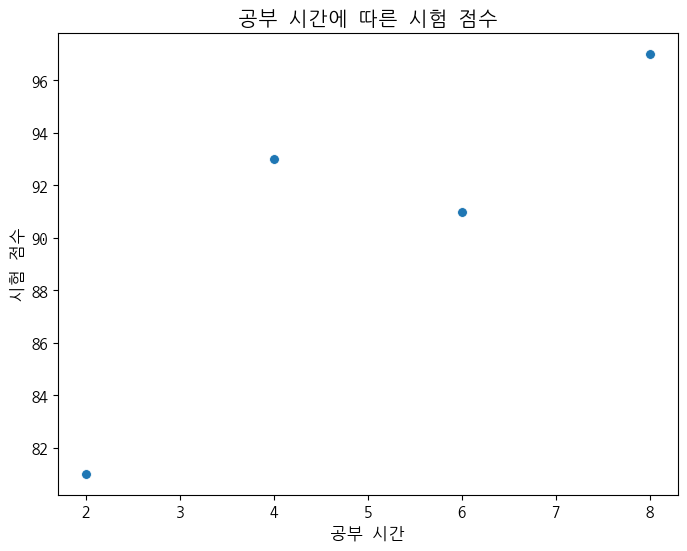

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='x', y='y', s=50)
plt.title('공부 시간에 따른 시험 점수')
plt.xlabel('공부 시간')
plt.ylabel('시험 점수')
plt.show()

기울기 공식

$$\frac{\sum_{i = 0}^{n - 1}(x_i - \bar x)(y_i - \bar y)}{\sum_{i = 0}^{n - 1}(x_i - \bar x)^2}$$

In [5]:
# 공부 시간과 공부 시간에 따른 시험 점수의 평균을 계산한다.
mean_x = np.mean(xData) # 공부 시간의 평균
mean_y = np.mean(yData) # 공부 시간에 따른 시험 점수의 평균
print('공부 시간의 평균: {}, 공부 시간에 따른 시험 점수의 평균: {}'.format(mean_x, mean_y))

공부 시간의 평균: 5.0, 공부 시간에 따른 시험 점수의 평균: 90.5


In [6]:
# 기울기 공식에서 분자를 계산하는 함수
def top(xData, mean_x, yData, mean_y):
    total = 0.0
    for i in range(len(xData)):
        total += (xData[i] - mean_x) * (yData[i] - mean_y)
    return total
    
numerator = top(xData, mean_x, yData, mean_y)
print(numerator)

46.0


In [7]:
# 기울기 공식에서 분모를 계산하는 함수
def bottom(xData, mean_x):
    total = 0.0
    for i in range(len(xData)):
        total += (xData[i] - mean_x) ** 2
    return total
    
denominator = bottom(xData, mean_x)
print(denominator)

20.0


In [8]:
print('기울기 공식의 분자: {}, 기울기 공식의 분모: {}'.format(numerator, denominator))
a = numerator / denominator
print('기울기: {}'.format(a))

기울기 공식의 분자: 46.0, 기울기 공식의 분모: 20.0
기울기: 2.3


y절편 공식

$$\bar y - a\bar x$$

In [9]:
b = mean_y - a * mean_x
print('y절편: {}'.format(b))

y절편: 79.0
